In [1]:
import adapml_data
import adapml_classification
import adapml_chemometrics
import adapml_statistics

# Import Data

In [2]:
path_to_data = 'C:\\Users\\csa97\\Research\\Projects\\DuLab\\ADAP-ML\\adap-ml\\data\\fisher_iris.csv'
path_to_resp = 'C:\\Users\\csa97\\Research\\Projects\\DuLab\\ADAP-ML\\adap-ml\\data\\fisher_iris_resp.csv'

data = adapml_data.DataImport(path_to_data)
response1D = adapml_data.DataImport.getResponse(path_to_resp);
response2D = adapml_data.DataImport.getDummyResponse(response1D);

variables = data.getVariableNames()
samples = data.getSampleNames()

# Statistics

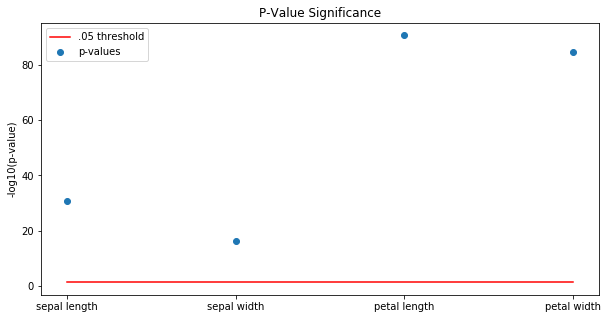

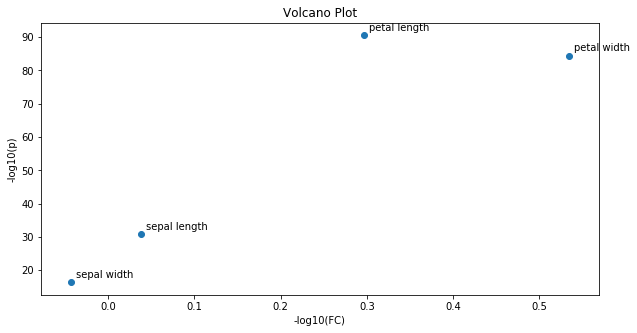

In [3]:
t_test = adapml_statistics.Statistics(data.data, 'anova', response1D)
t_test.plot_logp_values(variables)
t_test.plot_volcano_t(variables)

# Normalize Data

In [4]:
data.normalizeData("autoscale")

# Find Data Representations (Dimensionality Reduction)

In [5]:
pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)
pls = adapml_chemometrics.Chemometrics(data.data, "pls-da", response1D, kfolds=10, num_comp=2) # Also Predicts
opls = adapml_chemometrics.Chemometrics(data.data, "opls", response1D, kfolds=10, num_comp=2, opls_comp=2) #Also Predicts
lda = adapml_chemometrics.Chemometrics(data.data, "lda", response1D) # Also Predicts

4
2


# Compare Method Feature Vectors

PCA Projections
Projections of data into latent space.
Data is colored by response


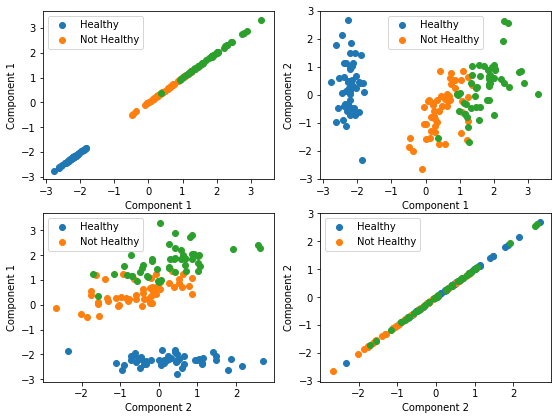

PLS Projections
Projections of data into latent space.
Data is colored by response


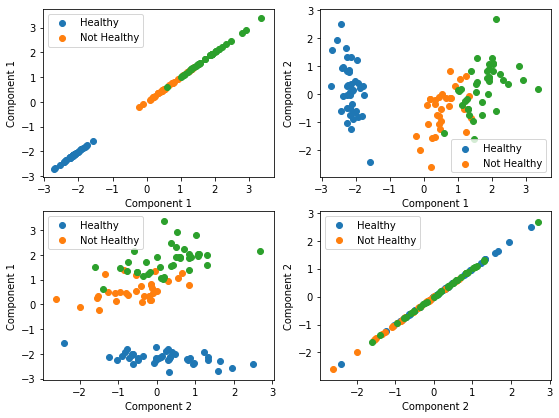

OPLS Projections
Projections of data into latent space.
Data is colored by response


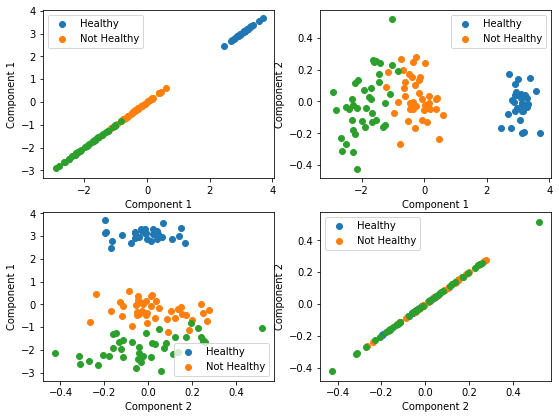

LDA Projections
Projections of data into latent space.
Data is colored by response


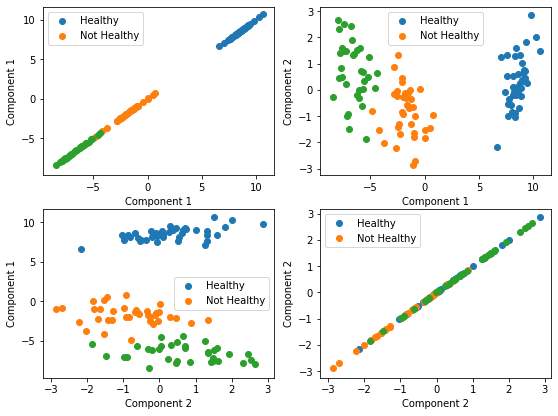

In [6]:
print("PCA Projections");pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])
print("PLS Projections");pls.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])
print("OPLS Projections");opls.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])
print("LDA Projections");lda.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])

PCA Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


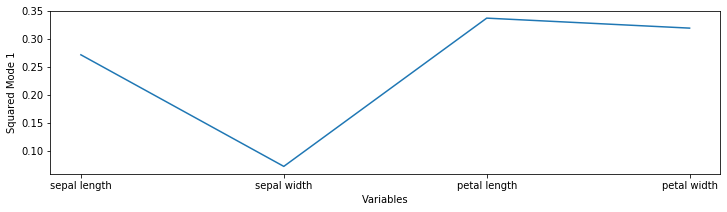

PLS Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


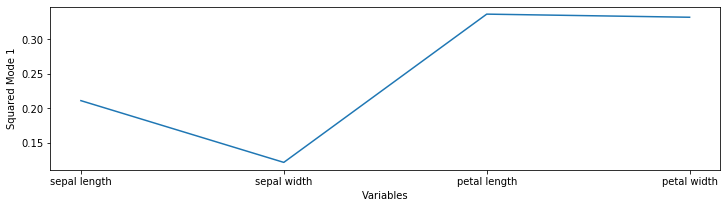

OPLS Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


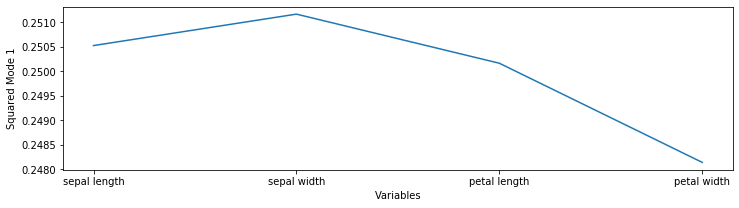

LDA Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


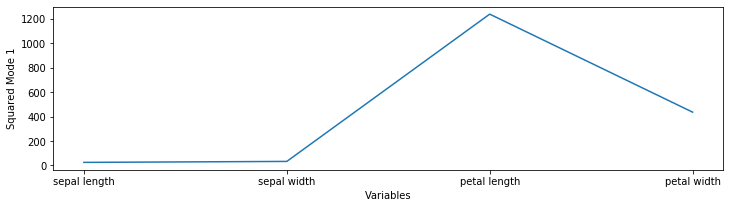

In [7]:
print("PCA Vectors"); pca.plotVectorLoadings(variables, 1)
print("PLS Vectors"); pls.plotVectorLoadings(variables, 1)
print("OPLS Vectors"); opls.plotVectorLoadings(variables, 1)
print("LDA Vectors"); lda.plotVectorLoadings(variables, 1)

# VIP Scores: PLS and OPLS

PLS
VIP Scores for original features with cross validation errors
Average Cross Validation Error: 0.3009745157399501

OPLS
VIP Scores for original features with cross validation errors
Average Cross Validation Error: 0.3521021130904992



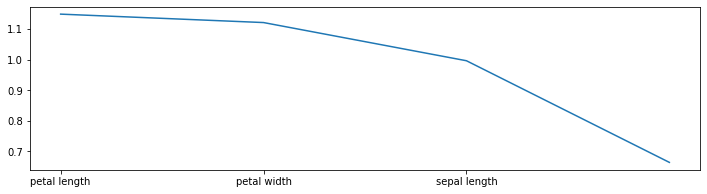

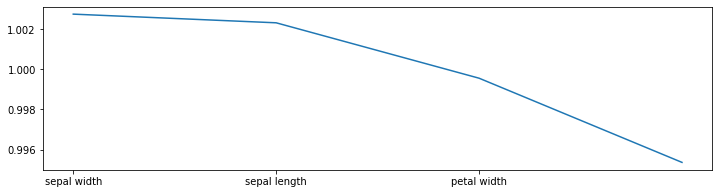

In [8]:
print("PLS"); pls.plotVIP(variables, 1)
print("OPLS"); opls.plotVIP(variables, 1)

# Train Other Classifiers

In [9]:
svm = adapml_classification.Classification(data.data, response1D, 'svm', .6, kfolds=3)
rnf = adapml_classification.Classification(data.data, response1D, 'randomforest', .6, kfolds=3)
mlp = adapml_classification.Classification(data.data, response1D, 'neuralnet', .6, kfolds=3)

SVM Validated Parameters:  {'kernel': 'linear', 'shrinking': True}
Random Forest Validated Parameters:  {'criterion': 'entropy', 'n_estimators': 100}
MLP Validated Parameters:  {'activation': 'identity', 'learning_rate': 'invscaling', 'solver': 'adam'}


# Classification Statistics

In [10]:
adapml_classification.print_model_stats(pls, "PLS")
adapml_classification.print_model_stats(opls, "OPLS")
adapml_classification.print_model_stats(lda, "LDA")
adapml_classification.print_model_stats(svm, "SVM")
adapml_classification.print_model_stats(rnf, "RF")
adapml_classification.print_model_stats(mlp, "MLP")

PLS: R^2=0.5669097302295926 Q^2=0.4476461446240614
OPLS: R^2=0.46824313715171256 Q^2=0.43068536882430264
LDA: R^2=0.9865884325230512 Q^2=0.9156492785793563
SVM: R^2=0.9838593974175036 Q^2=0.8918423464711274
RF: R^2=1.0 Q^2=0.9723523898781631
MLP: R^2=0.9481168332052268 Q^2=0.9520714865962632
